In [4]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [9]:
meine_daten = pd.read_csv("annotated_data/cleaned_annotated_data_training_800.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")



In [10]:
Nan = meine_daten[meine_daten["comment"].isnull()]
Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
Nan.loc[:, "Topic_article"] = "nan"


D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


                                       ID        Date   Time  Comment Level  \
407  dc560e1e-1b01-4bca-aac5-d1b5b3bf0e45  2021-02-13  16:46            0.0   
569  c449c319-bd29-47f8-87fb-9ec76d99c967  2021-03-15  15:11            0.0   
624  ad7ef84e-7733-46d8-8960-f09096480a50  2020-12-12  15:34            0.0   

             Username  Opinion Sentiment topic_comment Topic_article  \
407  Markus-vvb8EOEWg  neutral   neutral         tests     überblick   
569  Markus-vvb8EOEWg  neutral   neutral       impfung       impfung   
624  Markus-vvb8EOEWg  neutral   neutral      lockdown     überblick   

                                               comment  
407  Ich frage mich wie diese Schnelltests geprüft ...  
569  Es gibt zwei Möglichkeiten. Erstens, die Aussa...  
624  Ein »kompletter Lockdown« muss auch Gottesdien...  
defaultdict(<class 'list'>, {'knielang': ['neutral', 'negative', 'negative', 'neutral', 'negative']})
defaultdict(<class 'list'>, {'knielang': ['neutral', 'negative',

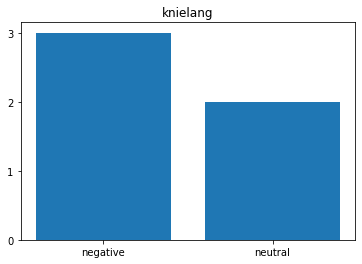

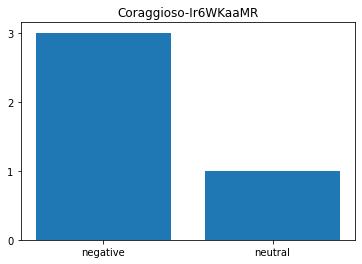

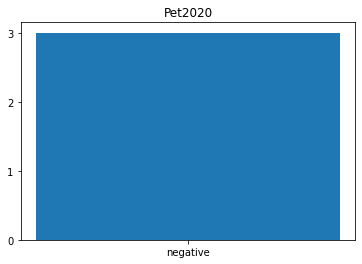

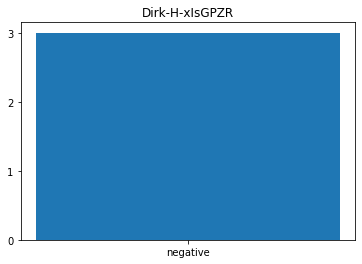

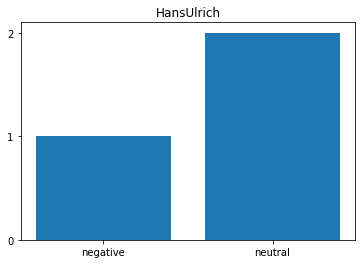

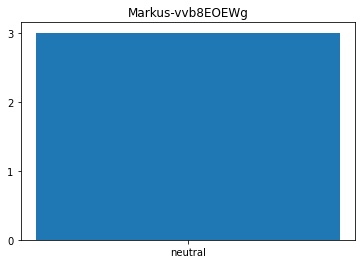

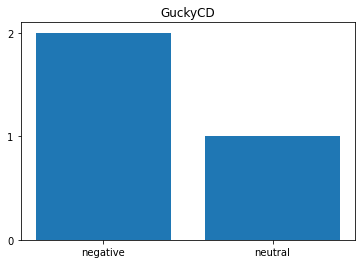

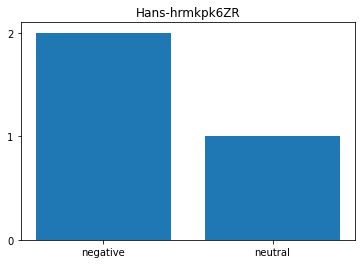

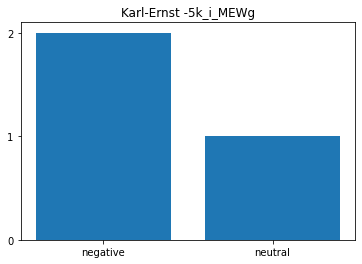

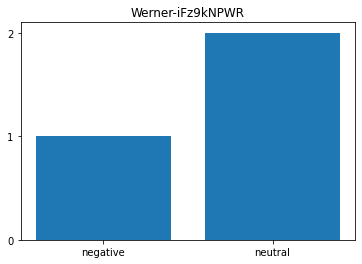

In [12]:



# stores username and the corresponding sentiment
sentiment_person = defaultdict(list)


meine_daten.update(Nan)
pd.set_option("display.max_rows", None)
# print(meine_daten.Username.value_counts())
print(meine_daten.loc[meine_daten.Username == "Markus-vvb8EOEWg"])
sentiment_verteilung = list(meine_daten.Sentiment.value_counts())
opinion_verteilung = list(meine_daten.Opinion.value_counts())

for username in meine_daten.Username.value_counts().index[:10]:
    liste = list(meine_daten.loc[meine_daten.Username == username]["Sentiment"])
    sentiment_person[username] = liste
    print(sentiment_person)

for key, value in sentiment_person.items():
    print(key, value)
    sentiment_person[key] = dict((l, value.count(l)) for l in set(value))


print(sentiment_person.keys())

for user in sentiment_person:
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    names = list(sentiment_person[user].keys()) 
    values = list(sentiment_person[user].values())
    plt.title(user)
    plt.bar(range(len(sentiment_person[user])), values, tick_label = names)
    plt.show()

In [31]:
print(*sentiment_person)

knielang Coraggioso-Ir6WKaaMR Pet2020 Dirk-H-xIsGPZR HansUlrich Markus-vvb8EOEWg GuckyCD Hans-hrmkpk6ZR Karl-Ernst -5k_i_MEWg Werner-iFz9kNPWR


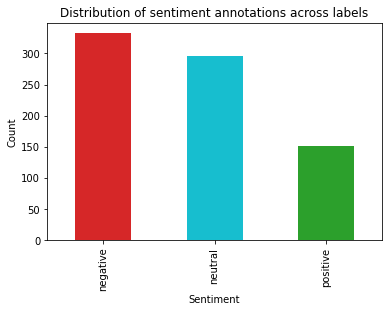

In [14]:
import matplotlib.pyplot as plt
sentiment = ["negative", "neutral", "positive"]


s = pd.Series(
    opinion_verteilung,
    index = sentiment
)


plt.title("Distribution of sentiment annotations across labels")
plt.ylabel('Count')
plt.xlabel('Sentiment')


ax = plt.gca()

my_colors = ["tab:red", "tab:cyan","tab:green"]

s.plot(kind="bar",
       color=my_colors)

plt.show()


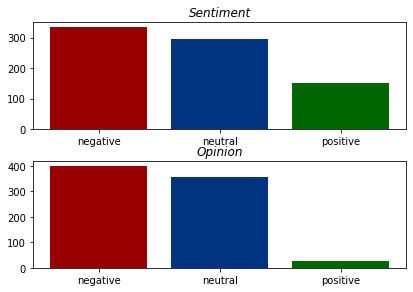

In [15]:
fig, (ax1, ax2) = plt.subplots(2)

fig.tight_layout()

ax1.bar(sentiment, opinion_verteilung, color= ["#990000", "#003380","#006600"])

ax2.bar(sentiment, sentiment_verteilung, color= ["#990000", "#003380","#006600"])

ax1.set_title("Sentiment", fontstyle="italic")
ax2.set_title("Opinion", fontstyle="italic")

plt.savefig("Distribution_Sentiment_Opinion")

In [29]:
print(opinion_verteilung[0] / sum(opinion_verteilung))

print(opinion_verteilung[1] / sum(opinion_verteilung))

print(opinion_verteilung[2] / sum(opinion_verteilung))

print(opinion_verteilung[2])


0.4
0.396
0.204
102


In [ ]:
import numpy as np

meine_daten.loc[(meine_daten.Opinion == "positive") & (meine_daten.Sentiment == "negative")]

# meine_daten.Sentiment.value_counts()

# meine_daten.loc[(meine_daten.Sentiment == "positive")]

In [3]:
import sklearn.metrics as metrics

### Cohens Kappa

Formula as follows:

$z = \frac{p_o-p_e}{1-p_e}$

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (...)

https://en.wikipedia.org/wiki/Cohen%27s_kappa

In [4]:
sven_opinion = []
vali_opinion = []

sven_sentiment = []
vali_sentiment = []

# Here we are reading in the data for cohens kappa
 
with open ("annotated_data/svens_agreement.txt") as sven:
    for line in sven:
        sven_opinion.append(line.split("\t")[5])
        sven_sentiment.append(line.split("\t")[6])
with open ("annotated_data/vali_agreement.txt") as vali:
    for line in vali:
        vali_opinion.append(line.split("\t")[5])
        vali_sentiment.append(line.split("\t")[6])

print(sven_sentiment)
print(vali_sentiment)

# We use sklearn method for this 

print(metrics.cohen_kappa_score(sven_opinion, vali_opinion))
metrics.cohen_kappa_score(sven_sentiment, vali_sentiment)


['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'neutral']
['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negat

0.6277145811789038

Reported values for Cohen's Kappa are **0.4782608695652174** and **0.6277145811789038** for Opinion and Sentiment Agreement Respectively.
<br>
<br>
These scores correspond to a specific Strength of Agreement

|Cohen's Kappa statistic   |Strength of Agreement
|---|---|
| 0.00  | Poor  |
|   0.00 - 0.20 | Slight  |
| 0.21 - 0.40  | Fair  |
| 0.41 - 0.60  | Moderate  |
| 0.61 - 0.80  | Substantial  |
| 0.81 - 1.00  | Almost Perfect  |

https://pubmed.ncbi.nlm.nih.gov/15883903/

The scores show **Moderate** and **Substantial** Agreement for Opinion and Sentiment respectivly. 
<br>
Even if these values show that the two annotators agreed in the majority of the cases, the task of annotating sentiment and opinion for a comment at hand was expected to be trivial, expecting higher values for kappa values in both cases.
<br>
By looking at the data, it is assumed that especially the neutral class was most diffcult to annotate and contributed the most to a decrease in score. This is why the following approach will count neutral classes from any annotator as agreeing labels in order to evaluate the difficulty of the neutral class

In [14]:
def kappa_o_neutral(agreements_1, agreements_2):
    """
    this function will return Cohen's Kappa without neutral classes
    :param agreements_1: list of strings
    :param agreements_2: list of strings
    :return: float
    """

    correct_correct = 0
    false_false = 0
    correct_false = 0
    false_correct = 0

    for idx, label in enumerate(agreements_1):

        # all cases where we have a "POS-POS-case"
        # Includes NEUTRAL NEUTRAL, POS POS, POS NEUTRAL, NEUTRAL POS
        if (label == agreements_2[idx] == "positive") or (label == agreements_2[idx] == "neutral") or ((label == "neutral") and (agreements_2[idx] == "positive")) or ((label == "positive") and (agreements_2[idx] == "neutral")):
            correct_correct += 1
        
        # all cases with "POS-NEG-case"
        elif ((label == "positive") and (agreements_2[idx] == "negative")):
            correct_false += 1

        # all cases with "NEG-POS-case"
        elif ((label == "negative") and (agreements_2[idx] == "positive")):
            false_correct += 1

        else:
            false_false += 1

    p_nought = (correct_correct + false_false) / (false_correct + correct_false + correct_correct + false_false)

    p_correct = (correct_correct + correct_false) / (correct_correct + correct_false + false_correct + false_false) * ((correct_correct + false_correct) / (correct_correct + correct_false + false_correct + false_false))

    p_incorrect = (false_correct + false_false) / (correct_correct + correct_false + false_correct + false_false) * ((correct_false + false_false) / (correct_correct + correct_false + false_correct + false_false))

    p_expected = p_correct + p_incorrect

    kappa = (p_nought - p_expected) / (1 - p_expected)

    print(p_nought, p_incorrect, p_correct)

    return kappa

kappa_o_neutral(vali_sentiment, sven_sentiment)

21 39 0 0
1.0 0.42250000000000004 0.12249999999999998


1.0

### Analysing specific users

We have seen that some users that have commented multiple times in the randomly sampled data show some consistency when it comes to the opinion and sentiment. The goal now is to annotate more comments from these users in order to get a broader overview and see if this consistency still holds true.



In [2]:
from bs4 import BeautifulSoup
from IPython.display import display
import requests
import os

In [13]:
class UserCommentProfiling:
    """
    A class for profiling specific users 


    Attributes
    ----------

    user: str
        The username of the user to profile

    
    Methods
    ---------
    get_title_and_subtitle()
        returns the title and subtitle

    """
    def __init__(self, user):

        """
        Parameters
        ----------
        user : str
            The username of the user to profile
        """

        self.user = user
    

    def get_user(self):
        """
        this method will return the username

        Returns
        ----------
        string
            The username.
        """
        return self.user


    def get_user_data(self):
        """
        This method returns a pandas object
        with comments from the given user

        Returns
        ----------
        pandas object
            with comments from the given user
        """

        # The first 87 comments had been annotated without article topic, this is why the colums get shifted for the first few elements
        data = pd.read_csv("annotated_data/cleaned_annotated_data_training.txt",  names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")
        Nan = data[data["comment"].isnull()]
        Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
        Nan.loc[:, "Topic_article"] = "nan"

        data[:88] = Nan

        current_user_data = data.loc[data.Username == self.user]
        

        # check how far I have already annotated in order to not include comments twice
        with open ("annotated_data/annotated_data_training.txt", mode="r", encoding="utf-8") as f:
            lines = [line for line in f.readlines() if line != "\n"]
            done_line = len(lines)

        data_weiter = pd.read_csv("shuffled_corona_relevante_kommentare.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "comment"], delimiter="\t")[done_line:]
        data_weiter = data_weiter.loc[data_weiter.Username == self.user]



        # Add missing columns to the dataframe (Here we are missing all labels in label_to_add)
        labels_to_add = ["Opinion", "Sentiment", "topic_comment", "Topic_article"]

        for i, label in enumerate(labels_to_add):
            data_weiter.insert(i+5, label, ["nan" for i in range(len(data_weiter))])

        # Concatenate both current progress of annotated comments of user and to be annoatated comments dataframes

        alle_user = pd.concat([current_user_data, data_weiter])
        display(alle_user)
        return alle_user
        
    def display_progress(self):
        """
        this method will display the annotation progress for the user given

        """

        mein_progress = pd.read_csv("annotated_data/users/" + self.user +"_dataframe.csv")


        for index, row in mein_progress.iterrows():
            if type(row["Opinion"]) != float:
                print(index)
            else:
                progress = index
                break
        display(mein_progress.iloc[:progress])


    def annotate(self, dataframe):
        """
        this method will return the will start annotation process for the user given

        """
        print(type((dataframe)))

        current_dir = os.getcwd()

        if not isinstance(dataframe, pd.DataFrame):
            print("reading csv")
            dataframe = pd.read_csv("annotated_data/users/" + dataframe)
            display(dataframe)
            as_csv = True
        else:
            as_csv = False
    
        labels = ["positive", "negative", "neutral", "exit"]


        for index, row in dataframe.iterrows():
            print(row["Opinion"], type(row["Opinion"]))
            if (as_csv and type(row["Opinion"]) != float):
                continue
            elif (not row["Opinion"] == "nan" and not as_csv):
                continue
                
            request = requests.get("https://www.spiegel.de/wissenschaft/medizin/corona-news-am-samstag-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-" + row["ID"])

            soup = BeautifulSoup(request.content, "html.parser")

            title = soup.find("title").text

            subtitle = soup.find("meta", property="og:description")["content"]

            Opinion_kommentar = input("Opinion ------" +row["comment"])

            while Opinion_kommentar not in labels:
                Opinion_kommentar = input("Opinion ------" +row["comment"])
            
            if Opinion_kommentar == "exit":
                dataframe.to_csv("annotated_data/users/" + self.user + "_dataframe.csv", encoding="utf-8-sig", index=False) 
                return

            Sentiment_kommentar = input("Sentiment ------" +row["comment"])

            while Sentiment_kommentar not in labels:
                Sentiment_kommentar  = input("Sentiment ------" +row["comment"])

            topic_comment = input("Topic Comment ------" +row["comment"])

            topic_article = input("Topic Article ------" +title + "\n" + subtitle)
            
            print(row)
            dataframe.loc[dataframe.ID == row["ID"], :] = [row["ID"], row["Date"] , row["Time"],row["Comment Level"], row["Username"],Opinion_kommentar, Sentiment_kommentar, topic_comment, topic_article, row["comment"]]
            # except ValueError:
            #     print([x for x in dataframe.loc[dataframe.ID == row["ID"]]], "XXXXXXXXXX", [row["ID"], row["Date"] , row["Time"],row["Comment Level"], row["Username"],Opinion_kommentar, Sentiment_kommentar, topic_comment, topic_article, row["comment"]])
            
            

            print(Opinion_kommentar, Sentiment_kommentar, topic_article, topic_comment)

            dataframe.to_csv("annotated_data/users/" + self.user + "_dataframe.csv", encoding="utf-8-sig", index=False)

# meine_daten = pd.read_csv("shuffled_corona_relevante_kommentare.txt", names=["ID", "Date", "Time", "Comment Level", "Username","comment"], delimiter="\t")

# frequent_users = ['knielang', 'Coraggioso-Ir6WKaaMR', 'Pet2020', 'Dirk-H-xIsGPZR', 'HansUlrich', 'Markus-vvb8EOEWg', 'GuckyCD', 'Hans-hrmkpk6ZR', 'Karl-Ernst -5k_i_MEWg', 'Werner-iFz9kNPWR']

# meine_daten = meine_daten[done_line:]

# meine_daten.loc[meine_daten.Username == "Pet2020"]

In [ ]:
# Pet2020', 'Dirk-H-xIsGPZR', 'HansUlrich', 'Markus-vvb8EOEWg', 'GuckyCD', 'Hans-hrmkpk6ZR', 'Karl-Ernst -5k_i_MEWg', 'Werner-iFz9kNPWR'

In [ ]:
### First we create an object for the user
### The get user method creates a dataframe that can be used to annotate.
### After this annotation, opinion can be annotated with "exit" in order to save the progress
### The following annotations are done using the .csv name of the file

meinUser = UserCommentProfiling('Dirk-H-xIsGPZR')
meinUser.display_progress()
# meinUser.get_title_and_subtitle("529f745f-c1a5-47ad-8be5-7121e770bf66")


# meinUser.annotate(meinUser.get_user_data())
# meinUser.annotate("Dirk-H-xIsGPZR_dataframe.csv")

### Plotting the Data

We have annotated the data for 4 user (30 comments each). In the following step, we will plot the sentiment and opinion development of each user and also show on which topics the user commented the most.

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import numpy as np
    

In [6]:
def plot_dev(user, rows, type):

    """
        Parameters
        ----------
        user : str
            The username of the user to be plotted

        rows: int
            Number of comments to plot


        type: str ("opinion" | "sentiment")
            If the samples to be plotted are opinion or sentiment
    """

    dataframe = pd.read_csv("annotated_data/users/" + user + "_dataframe.csv", nrows=rows)

    # print(dataframe.dtypes)
    user = user
    dataframe["Date"] = pd.to_datetime(dataframe["Date"])
    

    # nan = dataframe["Opinion"].notnull()

    # dataframe = dataframe.loc[nan]

    dataframe.sort_values(by="Date", inplace=True)

    first_date = dataframe["Date"][rows-1]
    last_date = dataframe["Date"][0]
    

    # display(dataframe)
    if type =="sentiment":
        meine_kategorie = dataframe.Sentiment
    elif type =="opinion":
        meine_kategorie = dataframe.Opinion
    colorsmap = {"negative": "orangered", "positive": "mediumseagreen", "neutral": "steelblue"}

    verts = []

    for i in range(len(dataframe)):
        verts.append([(i/10, 0.1),(i/10, 0.2),((i+1)/10, 0.2),((i+1)/10, 0.1)])




    colors = []
    for x in meine_kategorie:
        colors.append(colorsmap[x])

    print(colors)

    
    bars = PolyCollection(verts, facecolors=colors)
    fig, ax = plt.subplots()




    ax.add_collection(bars)
    ax.set_ylim([0.05, 0.25])
    ax.set_xlim(0, len(dataframe)*0.1)


    ticks = ax.get_xticklabels()
    ticks[0] = first_date
    ticks[-1] = last_date
    ax.set_xticklabels(ticks)

    ax.set_yticklabels([])
    ax.set_ylabel(type)

    plt.title(type + " development for user " + user)

In [86]:
frame = pd.read_csv("annotated_data/users/knielang_dataframe.csv", nrows=30)
display(frame)


,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,comment
0,5641bbb0-10d2-47a8-b677-d42335fe7db1,2021-05-11,04:06,0,knielang,neutral,neutral,lockdown,NaN,"𝗦𝗶𝗲𝗯𝗲𝗻-𝗧𝗮𝗴𝗲-𝗜𝗻𝘇𝗶𝗱𝗲𝗻𝘇 𝘀𝗶𝗻𝗸𝘁 𝗮𝘂𝗳 𝟭𝟭𝟱,𝟰 Ist also ..."
1,43fa62e5-7be1-41e0-9b0c-29ff5c9c6716,2021-03-16,10:11,0,knielang,positive,negative,maßnahmen,maskenpflicht,"Viel Aufregung um relativ wenig, ab nächster W..."
2,84d8adc0-50b8-446d-b21d-58e95d8668dd,2021-03-17,12:04,0,knielang,negative,negative,politik,überblick,Da fragen sich jetzt viele Deutsche warum sind...
3,c1f26daa-043f-422e-8cdf-d9f91044d399,2020-07-24,16:53,0,knielang,neutral,neutral,inzidenz,inzidenz,Vor 2 Wochen lag das gleitende 7-Tage-Mittel b...
4,b1c14ced-a163-40d7-8639-20f0971be1fa,2021-06-11,07:57,0,knielang,neutral,negative,wirtschaft,überblick,Ein niedriges Infektionsgeschehen ist gut für ...
5,43acd416-2f97-42b6-8ab5-116f5990a0f7,2021-06-24,17:18,0,knielang,positive,neutral,maßnahmen,überblick,»Meine These lautet: Wenn wir frühzeitige Maßn...
6,a5d28f2a-93c8-4a65-972b-47804bbb9125,2021-02-15,19:30,0,knielang,positive,neutral,maßnahmen,überblick,"»Wenn hier nicht alle vorsichtig sind, sind wi..."
7,43dc40cc-f273-446c-9891-d86eec8ae387,2021-01-14,22:03,0,knielang,neutral,neutral,infektion,überblick,Gouverneur Nelson Lima kündigte landesweite Au...
8,0abc42cd-95a4-4d7c-9ce7-c367a66306e3,2021-03-11,14:31,0,knielang,positive,negative,impfung,impfung,Vor schweren Krankheitsverläufen schützen alle...
9,dc560e1e-1b01-4bca-aac5-d1b5b3bf0e45,2021-02-13,14:59,0,knielang,neutral,neutral,infektion,überblick,Die Infektionszahlen bei Fußballern liegen deu...


['steelblue', 'orangered', 'steelblue', 'orangered', 'orangered', 'orangered', 'steelblue', 'orangered', 'orangered', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'orangered', 'orangered', 'orangered', 'steelblue', 'orangered', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'orangered', 'steelblue', 'steelblue', 'steelblue', 'steelblue']
['steelblue', 'orangered', 'steelblue', 'orangered', 'steelblue', 'mediumseagreen', 'orangered', 'mediumseagreen', 'steelblue', 'steelblue', 'steelblue', 'mediumseagreen', 'orangered', 'mediumseagreen', 'steelblue', 'steelblue', 'mediumseagreen', 'mediumseagreen', 'orangered', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'mediumseagreen', 'steelblue']
['orangered', 'orangered', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 

C:\Users\Kirchner\AppData\Local\Temp/ipykernel_6856/3160605058.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


['mediumseagreen', 'orangered', 'mediumseagreen', 'mediumseagreen', 'orangered', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'orangered', 'orangered', 'orangered', 'mediumseagreen', 'steelblue', 'mediumseagreen', 'steelblue', 'orangered', 'steelblue', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'steelblue', 'orangered', 'mediumseagreen', 'mediumseagreen', 'steelblue', 'steelblue', 'orangered', 'mediumseagreen', 'orangered']
['steelblue', 'orangered', 'orangered', 'orangered', 'orangered', 'steelblue', 'orangered', 'orangered', 'orangered', 'steelblue', 'steelblue', 'steelblue', 'orangered', 'orangered', 'orangered', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'steelblue', 'orangered', 'orangered']
['orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'mediumseagreen', 'orangered', 'orangered', 'orangered', 'steelb

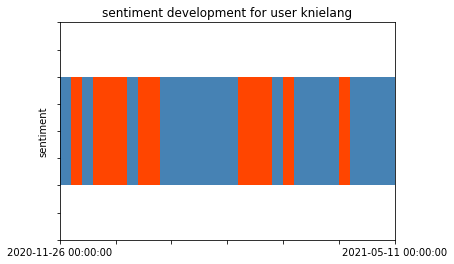

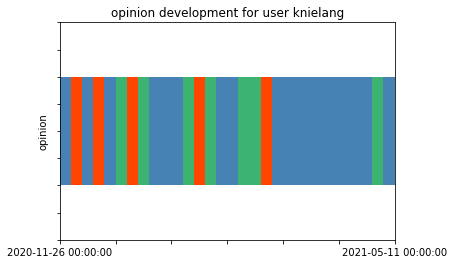

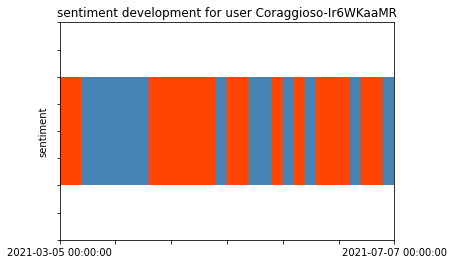

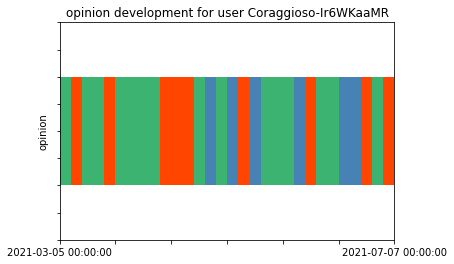

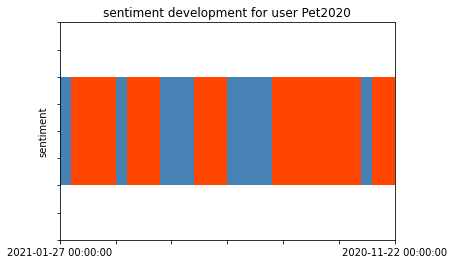

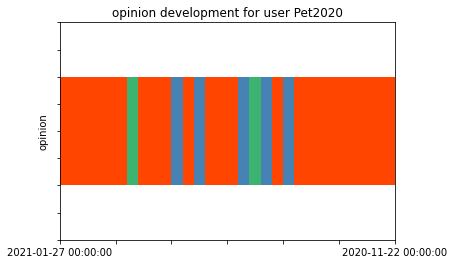

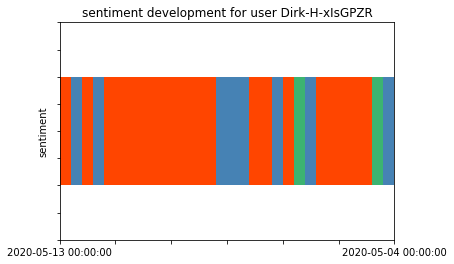

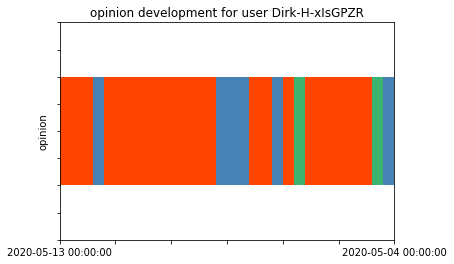

In [7]:
user = ['knielang', 'Coraggioso-Ir6WKaaMR', 'Pet2020', 'Dirk-H-xIsGPZR']

for x in user:
    for y in ["sentiment", "opinion"]:
        plot_dev(x, 30 , y)

### Results
This graph shows the development in sentiment and opinion from left to right.
Here we can see that users have longer periods where they keep a constant sentiment. This can be seen in longer "blocks" of one color. The majority of user "knielang"'s comments seem to contain a neutral sentiment wheras for other users, the sentiment seems to be negative in the majority of the cases. Opinion wise, the distribution for these analysed users seems to be more uneven, but users like "Dirk" and "Pet2020" still seem to utter a negative opinion in most of the cases. This is due to the fact that different topics are discussed in these comments, leading to differnet opinions for different topic. As a result, the graphic shown does not necesserily imply that opinion changes frequently for users like "Coraggioso" as they have to be put in relation with the topics of the comment.